In [2]:
#%% Imports
import os
import shutil
import nibabel as nib
import numpy as np
from glob import glob
from scipy import ndimage
from nilearn.image import resample_to_img, resample_img
from nilearn.masking import compute_background_mask, compute_epi_mask
from nilearn.plotting import plot_roi, plot_epi

In [ ]:
os.chdir('/home/uziel/DISS')
root = './data_processed/ISLES2017/training'
root_2 = './data/ISLES2017/training'
labels = [y for x in os.walk(root)
          for y in glob(os.path.join(x[0], '*OT*.nii.gz'))
         if 'clone' not in x[0]]
labels_original = sorted([y for x in os.walk(root_2)
                   for y in glob(os.path.join(x[0], '*OT*.nii'))])

for label in labels:
    label_original = [x for x in labels_original if os.path.basename(label).split('.')[-3] in x][0]
    print("Label: " + os.path.basename(label) + '. Label original :' + os.path.basename(label_original))
    label_img = nib.load(label)
    label_data = label_img.get_data()
    label_original_img = nib.load(label_original)
    label_original_data = label_original_img.get_data()
    print("Label N: " + str(label_data.size) + '. Label original N: ' + str(label_original_data.size))
    zero_elements = np.sum(label_data == 0)
    one_elements = np.sum(label_data == 1)
    zero_elements_original = np.sum(label_original_data == 0)
    one_elements_original = np.sum(label_original_data == 1)
    other_elements = label_data.size - zero_elements - one_elements
    other_elements_original = label_original_data.size - zero_elements_original - one_elements_original
    print("Label Zero: " + str(zero_elements) + ". Label One: " + str(one_elements) + ". Ratio: " + str(float(one_elements)/zero_elements * 100) + '. Other: ' + str(other_elements))
    print("Label Original Zero: "+ str(zero_elements_original) + ". Label Original One: " + str(one_elements_original) + ". Ratio: " + str(float(one_elements_original)/zero_elements_original * 100) + '. Other: ' + str(other_elements_original))
    print("")
    

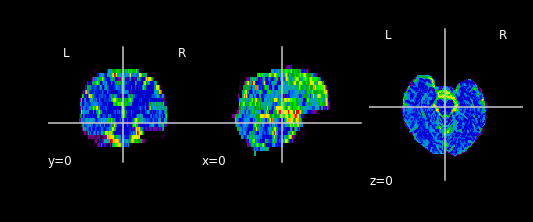

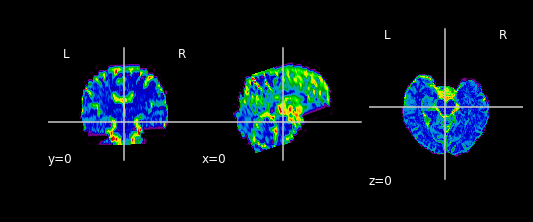

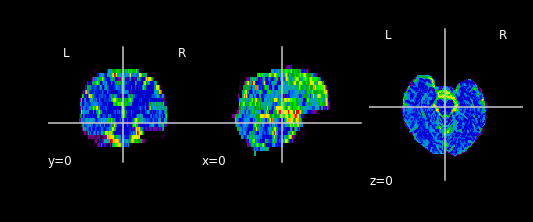

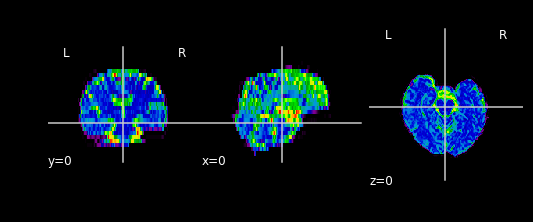

In [13]:
####################################
##### TEST RESAMPLING AND BACK #####
####################################

# Load image
img = nib.load('/home/uziel/DISS/data/ISLES2017/training/training_46/SMIR.Brain.XX.O.MR_ADC.188985/SMIR.Brain.XX.O.MR_ADC.188985.nii')
# Load template
template = nib.load('/home/uziel/DISS/data/MNI152_T1_1mm_brain.nii.gz')

# Resample img
dF = 0.7
resampled_img = resample_img(img,
                             template.affine[:3,:3]/dF,
                             interpolation='continuous')
plot_epi(img, cut_coords=(0,0,0))
plot_epi(resampled_img, cut_coords=(0,0,0))

# Get img back to normal
back_img = resample_img(resampled_img,
                        img.affine,
                        img.shape,
                        interpolation='continuous')

plot_epi(img, cut_coords=(0,0,0))
plot_epi(back_img, cut_coords=(0,0,0))
